In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import VarianceThreshold
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [35]:
path = 'epi_r.csv'
epidf = pd.read_csv(path,encoding='latin1')

In [36]:
epidf.head(1)

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,"Lentil, Apple, and Turkey Wrap",2.5,426.0,30.0,7.0,559.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [37]:
epidf.shape

(20052, 680)

In [5]:
epidf.describe()

,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,30 days of groceries,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
count,20052.000000,1.593500e+04,15890.000000,1.586900e+04,1.593300e+04,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,...,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000
mean,3.714467,6.322958e+03,100.160793,3.468775e+02,6.225975e+03,0.000299,0.000050,0.000848,0.001346,0.000349,...,0.001247,0.026332,0.000050,0.000299,0.014861,0.000150,0.000349,0.001396,0.000948,0.022741
std,1.340829,3.590460e+05,3840.318527,2.045611e+04,3.333182e+05,0.017296,0.007062,0.029105,0.036671,0.018681,...,0.035288,0.160123,0.007062,0.017296,0.121001,0.012231,0.018681,0.037343,0.030768,0.149080
min,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.750000,1.980000e+02,3.000000,7.000000e+00,8.000000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.375000,3.310000e+02,8.000000,1.700000e+01,2.940000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.375000,5.860000e+02,27.000000,3.300000e+01,7.110000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.000000,3.011122e+07,236489.000000,1.722763e+06,2.767511e+07,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


###  Protein has mean of 89, but max 23689, some outlier exists in this dataset

## Outlier protein Max with 236,489 while mean is 89.68

#### Identify outlier value

In [38]:
tempdf=epidf.dropna()

cmean=np.mean(tempdf['calories'])
pmean=np.mean(tempdf['protein'])
fmean=np.mean(tempdf['fat'])
smean=np.mean(tempdf['sodium'])

epidf['calories'] = epidf['calories'].fillna(cmean)
epidf['protein'] = epidf['protein'].fillna(pmean)
epidf['fat'] = epidf['fat'].fillna(fmean)
epidf['sodium'] = epidf['sodium'].fillna(smean)


In [39]:
epidf.describe()

,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,30 days of groceries,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
count,20052.000000,2.005200e+04,20052.000000,2.005200e+04,2.005200e+04,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,...,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000
mean,3.714467,6.328650e+03,100.194787,3.469003e+02,6.231473e+03,0.000299,0.000050,0.000848,0.001346,0.000349,...,0.001247,0.026332,0.000050,0.000299,0.014861,0.000150,0.000349,0.001396,0.000948,0.022741
std,1.340829,3.200697e+05,3418.593886,1.819768e+04,2.971161e+05,0.017296,0.007062,0.029105,0.036671,0.018681,...,0.035288,0.160123,0.007062,0.017296,0.121001,0.012231,0.018681,0.037343,0.030768,0.149080
min,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.750000,2.290000e+02,4.000000,1.000000e+01,1.230000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.375000,4.450000e+02,15.000000,2.400000e+01,4.665000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.375000,1.240000e+03,73.000000,8.200000e+01,1.914500e+03,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.000000,3.011122e+07,236489.000000,1.722763e+06,2.767511e+07,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [40]:
epidf.shape

(20052, 680)

In [41]:
checkoutlier=['calories','protein','fat','sodium'] 

from scipy.stats import iqr

for i in checkoutlier:
    top= np.percentile(tempdf[i], 75) + iqr(tempdf[i])*1.5
    bottom = np.percentile(tempdf[i], 25) - iqr(tempdf[i])*1.5
    
    epidf =  (epidf[epidf[i] >= bottom]) 
    epidf = (epidf[epidf[i] <= top]) 

    
    print(i  + str(' :  ' +str(top)  ))
    print(i  + str(' :  ' +str(bottom)  ))


calories :  1169.625
calories :  -383.375
protein :  63.0
protein :  -33.0
fat :  72.0
fat :  -32.0
sodium :  1659.5
sodium :  -864.5


In [42]:
epidf.shape

(13588, 680)

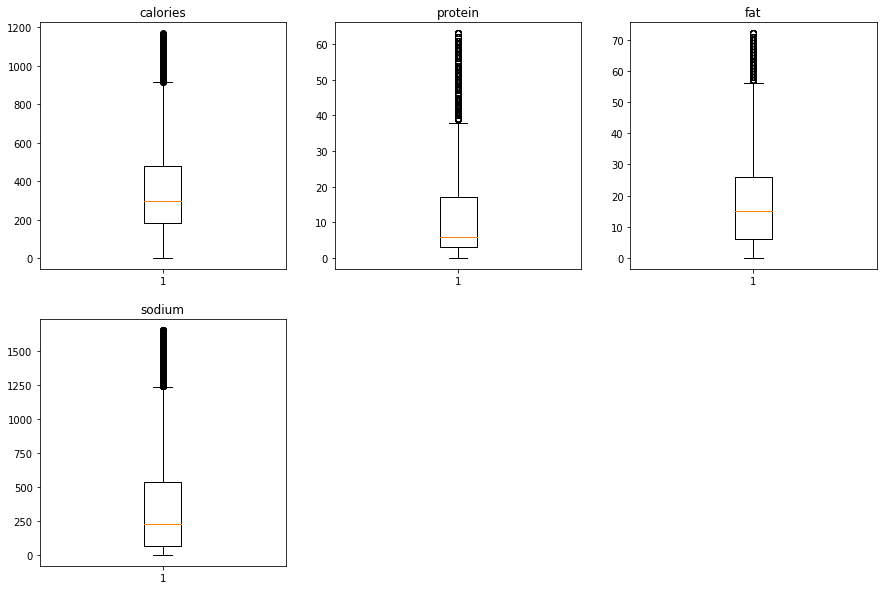

In [99]:
counter=1
plt.figure(figsize=(15, 10))
   
for i in checkoutlier:
    plt.subplot(2,3,counter)
    plt.boxplot(epidf[i])
    plt.title(i)
    counter+=1
plt.show()

In [ ]:
# anywhere > Q3 + 1.5 * IQR   if > this it is outlier, Q1 - 1.5*IQR this is less outlier

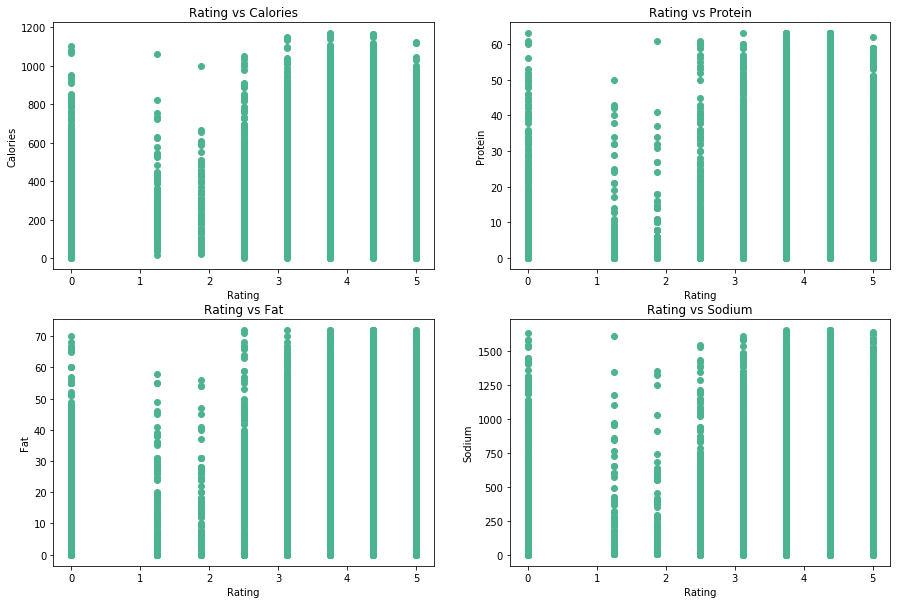

In [43]:
plt.figure(figsize=(15, 10))

colors="#4CB391"

plt.subplot(2,2,1)
plt.title('Rating vs Calories')
plt.xlabel('Rating')
plt.ylabel('Calories')


plt.scatter(epidf['rating'], epidf['calories'], c=colors)

plt.subplot(2,2,2)
plt.title('Rating vs Protein')
plt.xlabel('Rating')
plt.ylabel('Protein')
plt.scatter(epidf['rating'], epidf['protein'], c=colors)

plt.subplot(2,2,3)
plt.title('Rating vs Fat')
plt.xlabel('Rating')
plt.ylabel('Fat')
plt.scatter(epidf['rating'], epidf['fat'], c=colors)

plt.subplot(2,2,4)
plt.title('Rating vs Sodium')
plt.xlabel('Rating')
plt.ylabel('Sodium')
plt.scatter(epidf['rating'], epidf['sodium'], c=colors)

plt.show()

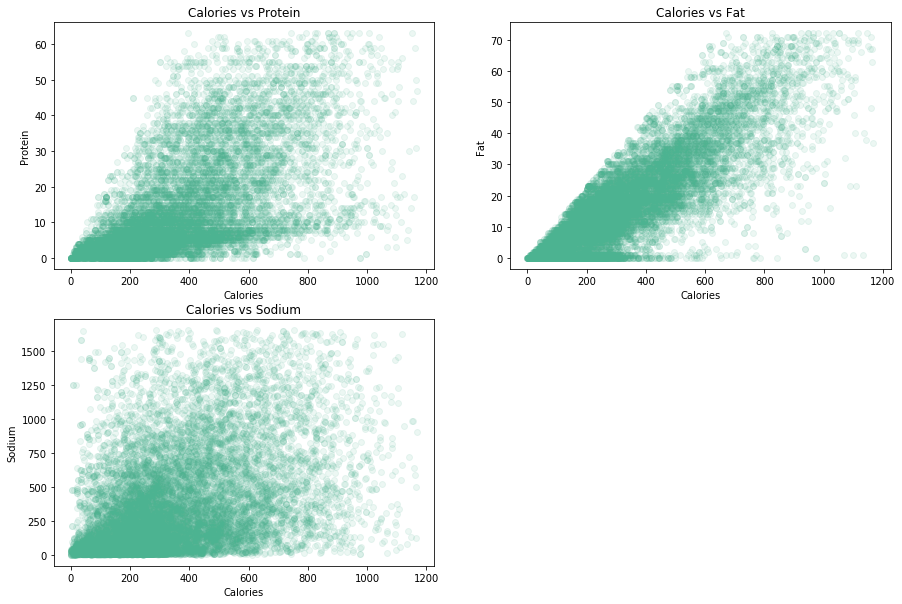

In [44]:
plt.figure(figsize=(15, 10))
colors="#4CB391"

plt.subplot(2,2,1)
plt.title('Calories vs Protein')
plt.xlabel('Calories')
plt.ylabel('Protein')
plt.scatter(epidf['calories'], epidf['protein'], c=colors,alpha=0.1)
plt.subplot(2,2,2)
plt.title('Calories vs Fat')
plt.xlabel('Calories')
plt.ylabel('Fat')
plt.scatter(epidf['calories'], epidf['fat'], c=colors,alpha=0.1)
plt.subplot(2,2,3)
plt.title('Calories vs Sodium')
plt.xlabel('Calories')
plt.ylabel('Sodium')
plt.scatter(epidf['calories'], epidf['sodium'], c=colors,alpha=0.1)
plt.show()

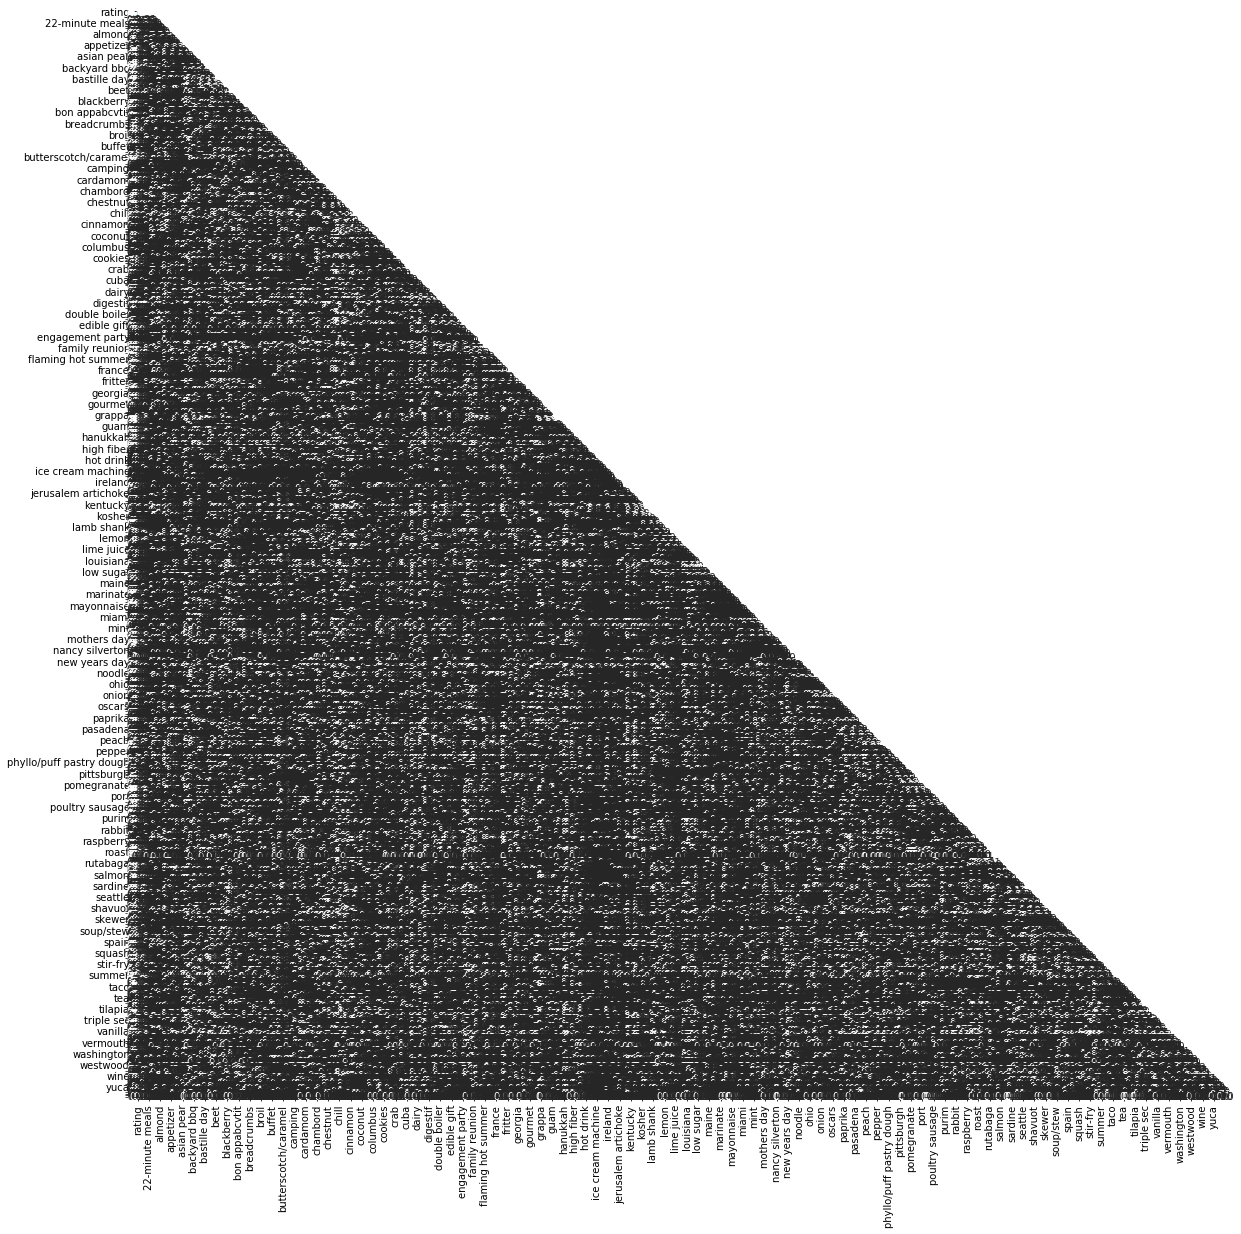

In [114]:
corrmat = epidf.corr() #use spearman method because all the data is ordinal  product moment corr (bool)
f, ax = plt.subplots(figsize=(20, 20))
mask = np.zeros_like(corrmat, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Draw the heatmap using seaborn
sns.heatmap(corrmat, cmap="YlGnBu",vmax=.8, mask=mask,square=True,annot=True,fmt='.2f', alpha=0.5,cbar=False) 
plt.show()

In [45]:
## Scaling

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
numerical = ['calories', 'protein', 'fat', 'sodium']
epidf[numerical] = scaler.fit_transform(epidf[numerical])
epidf.head(2)


,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,"Lentil, Apple, and Turkey Wrap",2.500,0.364726,0.476190,0.097222,0.33695,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,Boudin Blanc Terrine with Red Onion Confit,4.375,0.345034,0.285714,0.319444,0.86739,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
epidf = epidf.iloc[:,1:]

In [47]:
y = epidf['rating']
X = epidf.drop('rating', axis=1)

In [48]:
from sklearn.decomposition import PCA

pca = PCA(n_components=100)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (13588, 678)
transformed shape: (13588, 100)


In [49]:
X_pca = pd.DataFrame(X_pca, columns = ['Dimension 1','Dimension 2','Dimension 3','Dimension 4','Dimension 5','Dimension 6','Dimension 7','Dimension 8','Dimension 9','Dimension 10','Dimension 11','Dimension 12','Dimension 13','Dimension 14','Dimension 15','Dimension 16','Dimension 17','Dimension 18','Dimension 19','Dimension 20','Dimension 21','Dimension 22','Dimension 23','Dimension 24','Dimension 25','Dimension 26','Dimension 27','Dimension 28','Dimension 29','Dimension 30','Dimension 31','Dimension 32','Dimension 33','Dimension 34','Dimension 35','Dimension 36','Dimension 37','Dimension 38','Dimension 39','Dimension 40','Dimension 41','Dimension 42','Dimension 43','Dimension 44','Dimension 45','Dimension 46','Dimension 47','Dimension 48','Dimension 49','Dimension 50','Dimension 51','Dimension 52','Dimension 53','Dimension 54','Dimension 55','Dimension 56','Dimension 57','Dimension 58','Dimension 59','Dimension 60','Dimension 61','Dimension 62','Dimension 63','Dimension 64','Dimension 65','Dimension 66','Dimension 67','Dimension 68','Dimension 69','Dimension 70','Dimension 71','Dimension 72','Dimension 73','Dimension 74','Dimension 75','Dimension 76','Dimension 77','Dimension 78','Dimension 79','Dimension 80','Dimension 81','Dimension 82','Dimension 83','Dimension 84','Dimension 85','Dimension 86','Dimension 87','Dimension 88','Dimension 89','Dimension 90','Dimension 91','Dimension 92','Dimension 93','Dimension 94','Dimension 95','Dimension 96','Dimension 97','Dimension 98','Dimension 99','Dimension 100'])

In [50]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, 
                                                    test_size=0.2, 
                                                    random_state=1234)

In [51]:
from sklearn.linear_model import ElasticNet, Ridge, Lasso,LinearRegression,SGDRegressor
# Import Random Forest and Gradient Boosted Trees
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor


In [52]:
print( len(X_train), len(X_test), len(y_train), len(y_test) )

10870 2718 10870 2718


In [53]:
from sklearn import linear_model
y = y_train
X = X_train
lm = linear_model.LinearRegression()
model = lm.fit(X,y)
predictions = lm.predict(X)
print(predictions)
y_train=y
X_train=X


[ 3.48183077  3.99872962  3.60388895 ...,  3.76410931  3.70203396
  4.21173043]


In [54]:
# Function for creating model pipelines
from sklearn.pipeline import make_pipeline
# For standardization
from sklearn.preprocessing import StandardScaler

In [55]:
# Create pipelines dictionary
pipelines = {
    'lasso' : make_pipeline(StandardScaler(), Lasso(random_state=123)),
    'ridge' : make_pipeline(StandardScaler(), Ridge(random_state=123)),
    'enet'  : make_pipeline(StandardScaler(), ElasticNet(random_state=123))
#    'LinearRegression' : make_pipeline(StandardScaler(), Ridge(random_state=123)),
#    'SGDRegressor'  : make_pipeline(StandardScaler(), ElasticNet(random_state=123))
}

In [56]:
# Add a pipeline for 'rf'
pipelines['rf'] = make_pipeline(StandardScaler(), RandomForestRegressor(random_state=123))
# Add a pipeline for 'gb'
pipelines['gb'] = make_pipeline(StandardScaler(), GradientBoostingRegressor(random_state=123))

In [57]:
# List tuneable hyperparameters of our Lasso pipeline
pipelines['lasso'].get_params()

{'lasso': Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
    normalize=False, positive=False, precompute=False, random_state=123,
    selection='cyclic', tol=0.0001, warm_start=False),
 'lasso__alpha': 1.0,
 'lasso__copy_X': True,
 'lasso__fit_intercept': True,
 'lasso__max_iter': 1000,
 'lasso__normalize': False,
 'lasso__positive': False,
 'lasso__precompute': False,
 'lasso__random_state': 123,
 'lasso__selection': 'cyclic',
 'lasso__tol': 0.0001,
 'lasso__warm_start': False,
 'memory': None,
 'standardscaler': StandardScaler(copy=True, with_mean=True, with_std=True),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'steps': [('standardscaler',
   StandardScaler(copy=True, with_mean=True, with_std=True)),
  ('lasso', Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=123,
      selection='cyclic', tol=0.0001, warm_start=False))]}

In [58]:
# Lasso hyperparameters
lasso_hyperparameters = { 
    'lasso__alpha' : [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10] 
}
# Ridge hyperparameters
ridge_hyperparameters = { 
    'ridge__alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10]  
}

In [59]:
enet_hyperparameters = { 
    'elasticnet__alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10],                        
    'elasticnet__l1_ratio' : [0.1, 0.3, 0.5, 0.7, 0.9]  
}

In [60]:
rf_hyperparameters = { 
    'randomforestregressor__n_estimators' : [1500, 3000]#,
#    'randomforestregressor__max_features': ['auto', 'sqrt', 0.33],
}

In [61]:
# Boosted tree hyperparameters
gb_hyperparameters = { 
#    'gradientboostingregressor__n_estimators': [100, 200],
#    'gradientboostingregressor__learning_rate' : [0.05, 0.1, 0.2],
#    'gradientboostingregressor__max_depth': [1, 3, 5]
    'gradientboostingregressor__n_estimators': [1500, 2000]#,
 #   'gradientboostingregressor__learning_rate' : [0.05, 0.1, 0.2] 
}

In [62]:
hyperparameters = {
    'rf' : rf_hyperparameters,
    'gb' : gb_hyperparameters,
    'lasso' : lasso_hyperparameters,
    'ridge' : ridge_hyperparameters,
    'enet' : enet_hyperparameters
}

In [63]:
for key in ['enet', 'gb', 'ridge', 'rf', 'lasso']:
    if key in hyperparameters:
        if type(hyperparameters[key]) is dict:
            print( key, 'was found in hyperparameters, and it is a grid.' )
        else:
            print( key, 'was found in hyperparameters, but it is not a grid.' )
    else:
        print( key, 'was not found in hyperparameters')

enet was found in hyperparameters, and it is a grid.
gb was found in hyperparameters, and it is a grid.
ridge was found in hyperparameters, and it is a grid.
rf was found in hyperparameters, and it is a grid.
lasso was found in hyperparameters, and it is a grid.


In [64]:
import sklearn
print(sklearn.__version__)

0.19.1


In [65]:
# Helper for cross-validation
from sklearn.model_selection import GridSearchCV
#from sklearn.grid_search import GridSearchCV

In [66]:
# Create cross-validation object from Lasso pipeline and Lasso hyperparameters
model = GridSearchCV(pipelines['lasso'], hyperparameters['lasso'], cv=10, n_jobs=-1)

In [67]:
# Fit and tune model
model.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lasso', Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=123,
   selection='cyclic', tol=0.0001, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'lasso__alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [68]:
# Create empty dictionary called fitted_models
fitted_models = {}

# Loop through model pipelines, tuning each one and saving it to fitted_models
for name, pipeline in pipelines.items():
    # Create cross-validation object from pipeline and hyperparameters
    model = GridSearchCV(pipeline, hyperparameters[name], cv=10, n_jobs=-1)
    
    # Fit model on X_train, y_train
    model.fit(X_train, y_train)
    
    # Store model in fitted_models[name] 
    fitted_models[name] = model
    
    # Print '{name} has been fitted'
    print(name, 'has been fitted.')

lasso has been fitted.
gb has been fitted.
rf has been fitted.
enet has been fitted.
ridge has been fitted.


In [69]:
# Check that we have 5 cross-validation objects
for key, value in fitted_models.items():
    print( key, type(value) )

lasso <class 'sklearn.model_selection._search.GridSearchCV'>
gb <class 'sklearn.model_selection._search.GridSearchCV'>
rf <class 'sklearn.model_selection._search.GridSearchCV'>
enet <class 'sklearn.model_selection._search.GridSearchCV'>
ridge <class 'sklearn.model_selection._search.GridSearchCV'>


In [70]:
from sklearn.exceptions import NotFittedError

for name, model in fitted_models.items():
    try:
        pred = model.predict(X_test)
        print(name, 'has been fitted.')
    except NotFittedError as e:
        print(repr(e))

lasso has been fitted.
gb has been fitted.
rf has been fitted.
enet has been fitted.
ridge has been fitted.


In [71]:
# Display best_score_ for each fitted model
for name, model in fitted_models.items():
    print( name, model.best_score_ )

lasso 0.123159676265
gb 0.172842313511
rf 0.238739802172
enet 0.123192445868
ridge 0.122229181943


In [72]:
# Import r2_score and mean_absolute_error functions
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

In [73]:
fitted_models['rf']

GridSearchCV(cv=10, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('randomforestregressor', RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decr...timators=10, n_jobs=1,
           oob_score=False, random_state=123, verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'randomforestregressor__n_estimators': [1500, 3000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [74]:
# Predict test set using fitted random forest
pred = fitted_models['rf'].predict(X_test)

In [75]:
# Calculate and print R^2 and MAE
print( 'R^2:', r2_score(y_test, pred ))
print( 'MAE:', mean_absolute_error(y_test, pred))

R^2: 0.246033251341
MAE: 0.787005926101


In [76]:
# Code here
for name, model in fitted_models.items():
    pred = model.predict(X_test)
    print( name )
    print( '--------' )
    print( 'R^2:', r2_score(y_test, pred ))
    print( 'MAE:', mean_absolute_error(y_test, pred))
    print()

lasso
--------
R^2: 0.137682168264
MAE: 0.863037505005

gb
--------
R^2: 0.177917308627
MAE: 0.822996138895

rf
--------
R^2: 0.246033251341
MAE: 0.787005926101

enet
--------
R^2: 0.137955776396
MAE: 0.862878704201

ridge
--------
R^2: 0.139802371353
MAE: 0.862244367074



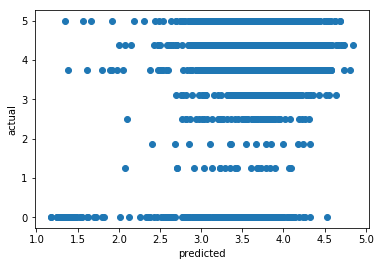

In [77]:
gb_pred = fitted_models['ridge'].predict(X_test)
plt.scatter(gb_pred, y_test)
plt.xlabel('predicted')
plt.ylabel('actual')
plt.show()

In [78]:
type(fitted_models['rf'])

sklearn.model_selection._search.GridSearchCV

In [79]:
fitted_models['rf'].best_estimator_

Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('randomforestregressor', RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=3000, n_jobs=1,
           oob_score=False, random_state=123, verbose=0, warm_start=False))])

In [80]:
import pickle

In [81]:
with open('final_model.pkl', 'wb') as f:
    pickle.dump(fitted_models['rf'].best_estimator_, f)

In [82]:
from sklearn import svm
y= y.astype(int)
y.head()

7058     3
4600     5
16835    0
11107    4
2312     3
Name: rating, dtype: int64

In [83]:
clf = svm.SVC(kernel='linear', C = 1.0)
clf.fit(X,y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [84]:
y_test= y_test.astype(int)
y=y.astype(int)

In [85]:
clf.score(X_test, y_test)

0.46284032376747608

In [86]:

model = svm.SVC(kernel='linear', C=1, gamma=1) 
model.fit(X, y)

model.score(X_test, y_test)

0.46284032376747608

In [87]:
from sklearn.svm import SVR
clf = SVR(kernel='rbf', C=1, gamma=1)
clf.fit(X, y)
predict=clf.predict(X_test)



In [ ]:
clf.score(X,y)

In [90]:
from sklearn.svm import SVC
from sklearn import feature_selection
import time

start = time.time()
svc = SVC(kernel="linear", C=1)
rfe = feature_selection.RFE(estimator=svc, n_features_to_select=1, step=1)
rfe.fit(X, y)
ranking = rfe.ranking_.reshape(X_pca.shape)



# Plot pixel ranking
plt.matshow(ranking, cmap=plt.cm.Blues)
plt.colorbar()
plt.title("Ranking of pixels with RFE")
plt.show()

end = time.time()

ValueError: cannot reshape array of size 100 into shape (13588,100)

In [91]:
start

1512711364.6932826

In [92]:
end

NameError: name 'end' is not defined